In [1]:
from numpy.linalg import inv
from numpy import dot, transpose

X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]
print(dot(inv(dot(transpose(X), X)), dot(transpose(X), y)))

[[ 1.1875    ]
 [ 1.01041667]
 [ 0.39583333]]


In [2]:
from numpy.linalg import lstsq

X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]
print(lstsq(X, y)[0])

[[ 1.1875    ]
 [ 1.01041667]
 [ 0.39583333]]


In [3]:
from sklearn.linear_model import LinearRegression

X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(X, y)
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))
    print('R-squared: %.2f' % model.score(X_test, y_test))

Predicted: [ 10.0625], Target: [11]
R-squared: 0.77
Predicted: [ 10.28125], Target: [8.5]
R-squared: 0.77
Predicted: [ 13.09375], Target: [15]
R-squared: 0.77
Predicted: [ 18.14583333], Target: [18]
R-squared: 0.77
Predicted: [ 13.3125], Target: [11]
R-squared: 0.77


# Polynomial Regression

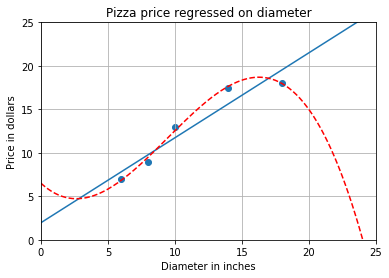

[[6], [8], [10], [14], [18]]
[[  1.00000000e+00   6.00000000e+00   3.60000000e+01   2.16000000e+02]
 [  1.00000000e+00   8.00000000e+00   6.40000000e+01   5.12000000e+02]
 [  1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03]
 [  1.00000000e+00   1.40000000e+01   1.96000000e+02   2.74400000e+03]
 [  1.00000000e+00   1.80000000e+01   3.24000000e+02   5.83200000e+03]]
[[6], [8], [11], [16]]
[[  1.00000000e+00   6.00000000e+00   3.60000000e+01   2.16000000e+02]
 [  1.00000000e+00   8.00000000e+00   6.40000000e+01   5.12000000e+02]
 [  1.00000000e+00   1.10000000e+01   1.21000000e+02   1.33100000e+03]
 [  1.00000000e+00   1.60000000e+01   2.56000000e+02   4.09600000e+03]]
Simple linear regression r-squared 0.809726797708
Quadratic regression r-squared 0.835692415604


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]
regressor = LinearRegression()
regressor.fit(X_train, y_train, 3)
xx = np.linspace(0, 26, 200)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)
quadratic_featurizer = PolynomialFeatures(degree=3)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r', linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('Simple linear regression r-squared', regressor.score(X_test,y_test))
print('Quadratic regression r-squared',regressor_quadratic.score(X_test_quadratic, y_test))

# Applying linear regression

In [5]:
import pandas as pd
df = pd.read_csv('winequality-red.csv', sep=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


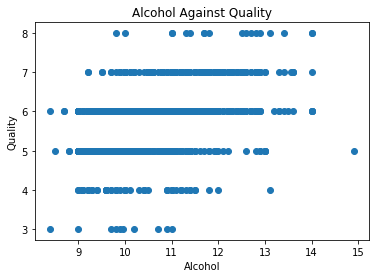

In [6]:
import matplotlib.pylab as plt
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol Against Quality')
plt.show()

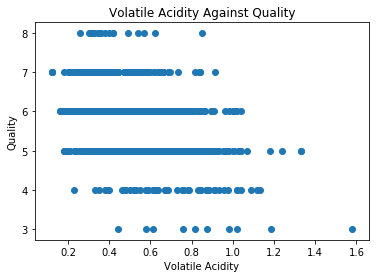

In [7]:
import matplotlib.pylab as plt

plt.scatter(df['volatile acidity'], df['quality'])
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('Volatile Acidity Against Quality')
plt.show()

In [8]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [9]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('./winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print('R-squared: %s' % regressor.score(X_test, y_test))

R-squared: 0.378925998379


In [11]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

df = pd.read_csv('./winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
regressor = LinearRegression()
scores = cross_val_score(regressor, X, y, cv=5)
print(scores.mean())
print(scores)

0.290041628842
[ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ]


# Gradient descent

In [17]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [18]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test.reshape(-1, 1))

regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, X_train, y_train, cv=5)

print('Cross validation r-squared scores: %s' % scores)
print('Average cross validation r-squared score: %s' % np.mean(scores))

regressor.fit(X_train, y_train)
print('Test set r-squared score %s' % regressor.score(X_test, y_test))

Cross validation r-squared scores: [ 0.72395147  0.6171433   0.79918272  0.66847144  0.67829755]
Average cross validation r-squared score: 0.697409294645
Test set r-squared score 0.723449585609
